Precipitation Analysis :It's hard to observe a seasonality based on the four seasons. Records appear to haverandomly high precepitaion days like 4 times a year. 

Temperature Analysis:Records are skewed towards temperatures between 65 to 80 degrees. 

# Step 1 - Climate Analysis and Exploration

In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [48]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# view the data in Measurement
measure_row1=session.query(Measurement).first()
measure_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1934480a3d0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [53]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

prp_data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>="2016-08-24").\
    filter(Measurement.date<="2017-08-23").all()
prp_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [72]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prp_df=pd.DataFrame(prp_data).set_index('date')
#prp_df
prp_df=prp_df.rename(columns={'prcp':'precipitation'})
# Sort the dataframe by date
prp_df=prp_df.sort_values(by='date').dropna()
prp_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


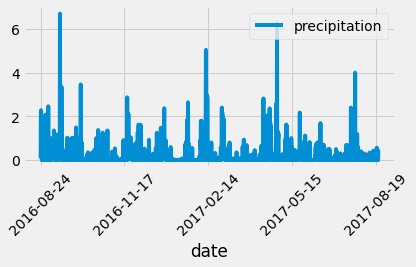

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data
prp_df.plot(rot=45)
plt.title="Last 12 month's Precipitation"
plt.tight_layout()
plt.savefig("output_files/Precipitation.png")
plt.show()


In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prp_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [83]:
# View data in Station

station_row1=session.query(Station).first()
station_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1934480ad00>,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'longitude': -157.8168,
 'latitude': 21.2716}

In [89]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(station.id).count()
print(f'Station count is {station_count}')

Station count is 9


In [94]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_active=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id='USC00519281'
session.query(func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)).filter(Measurement.station==station_id).all()


[(54.0, 85.0, 71.66378066378067)]

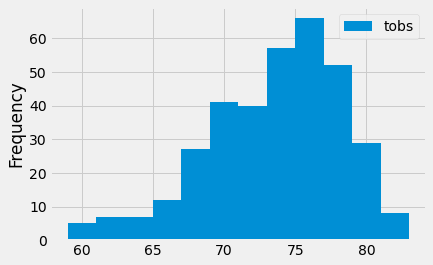

In [115]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>="2016-08-24").\
    filter(Measurement.date<="2017-08-23").filter(Measurement.station==station_id).all()
temp_df=pd.DataFrame(temp_data)
#temp_df
temp_df.plot.hist(bins=12)
plt.title='Temperature observed at station-USC00519281'
plt.savefig("output_files/Temperature.png")
plt.show()

# Close session

In [116]:
# Close Session
session.close()